In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

<font size="5" color="red"><b>ch4. 머신러닝 모형 최적화</b></font>
# 1절. 변수 선택과 차원 축소
## 1-1 변수선택과 차원축소
- 종속변수에 영향을 주는 변수들을 찾아 학습에 사용할 독립변수의 수를 줄임(어떻게 하면 score를 높일 수 있을지?)
- 과적합과 변수들 사이의 다중공선성(변수들간 강한 상관관계)을 줄일 수 있음
 * 회귀계수 해석이 어려워짐. 모델 예측력이 좋아도 해석력이 떨어짐(어떤 변수가 제일 큰 요인인지 잘), p값이나 유의성 검정이 왜곡될 수 있음
- 모형의 학습 시간을 줄일 수 있음
- 주성분분석, 상관분석, **분류모형의 feature_importance_, 예측 모형의 coef_**
- SelectKBest : 가장 높은 score에 따라 K개의 특징을 선택
## 1-2 주성분분석(PCA, Principal Component Anaysis)
- 주성분분석은 변수 선택 및 차원축소 방법(기존의 모든 변수를 조합하여 새로운 변수로 만듦) 으로 널리 사용
- 주성분 분석은 상관관계가 있는 변수들을 선형결합해서 **분산이 극대화된 상관관계가 없는 새로운 변수(주성분)들로 축약**하는 것
- 주성분 분석은 사실 선형대수학이라기보다는 선형대수학의 활용적인 측면이 강하며 영상인식, 통계 데이터분석(주성분 찾기), 데이터 압축, 노이즈제거 등 여러 분야에 사용
- 영상처리에서 많이 활용 : 여러개의 영상 중 대표 이미지를 찾을 때 활용

In [10]:
import seaborn as sns
from sklearn.decomposition import PCA
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:,:-1], iris.species
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
pca = PCA(n_components=2)  # n_components=2 : 주성분의 갯수
pca.fit(iris_X)
iris_pca = pca.transform(iris_X)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [11]:
# 각 주성분의 계수 : 각 주성분이 원래 특성들과 어떤 관계가 있는지 나타내는 가중치
pca.components_
# 주성분 1 = 0.36138659*x1 -0.08452251*x2 + 0.85667061*x3 + 0.3582892*x4

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [12]:
# 설명분산 : 각 주성분 벡터가 정보량을 얼마나 잘 표현하는지(설명하는지)
pca.explained_variance_

array([4.22824171, 0.24267075])

In [13]:
# 설명분산을 0~1사이의 비율로 조정된 설명정도 : 주성분 결과 특성은 97.76852%
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

# 1-3 상관관계 확인
- 각 변수들끼리 상관관계 확인(시각화), 종속변수와 상관관계가 높은 변수들만 선택

In [16]:
import pandas as pd
# redwine = pd.read_csv('data/winequality-red.csv', delimiter=';')
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
corr = redwine.corr()
# 상관관계 결과를 시각화

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# cmap의 종류 : https://jrc-park.tistory.com/155
# http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html

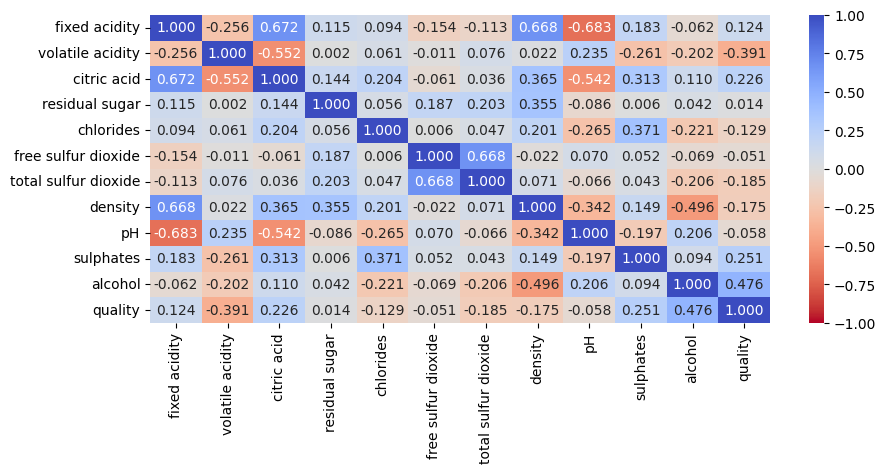

In [29]:
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='coolwarm_r')
plt.show()

In [36]:
np.triu(np.ones_like(corr), k=0)  # 대각선 포함 위가 1인 삼각행렬
np.triu(np.ones_like(corr), k=1)  # 대각선 제외 위가 1인 삼각행렬
np.tril(np.ones_like(corr), k=0)  # 대각선 포함 아래가 1인 삼각행렬
np.tril(np.ones_like(corr), k=-1)  # 대각선 제외 아래가 1인 삼각행렬

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

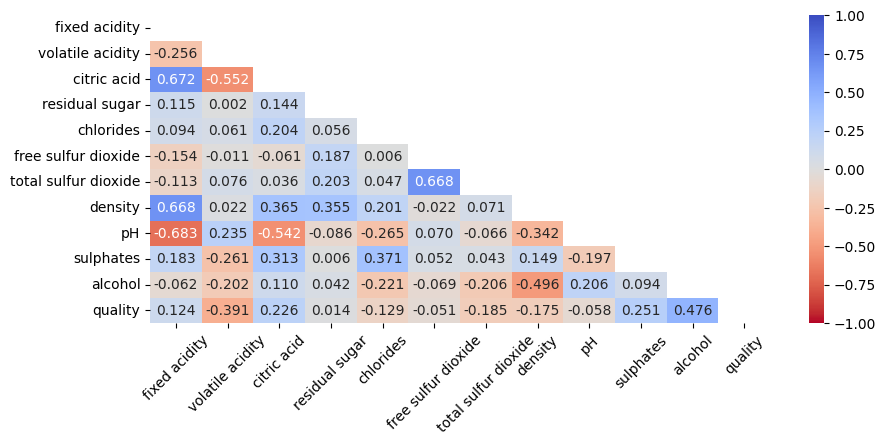

In [38]:
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='coolwarm_r',
           mask=mask)
plt.xticks(rotation=45)
plt.show()

## 1-4 분류모형의 Feature_importance
- 분류모형의 feature_importance_ 속성은 각 독립변수들이 종속변수에 영향을 주는 정도
- LogisticRegression이나 SVC, MLP, GaussianNB등은 feature_importance_가 없음
- 그 외 분류모형은 사용가능

In [40]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:,:-1]
y = redwine.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   )
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10,  # 트리 갯수 10개
                                  # criterion='gini',
                                 random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [44]:
rf_model.feature_importances_

array([0.07453203, 0.1029455 , 0.07186369, 0.0580052 , 0.09439026,
       0.06742067, 0.11061317, 0.07940014, 0.08764692, 0.10576059,
       0.14742184])

In [49]:
features = pd.DataFrame(data = np.c_[X.columns, rf_model.feature_importances_],
                       columns=['feature','importance']
                       )
features['importance'].sum()

1.0

In [54]:
features.sort_values(by='importance', ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.147422
1,total sulfur dioxide,0.110613
2,sulphates,0.105761
3,volatile acidity,0.102945
4,chlorides,0.09439
5,pH,0.087647
6,density,0.0794
7,fixed acidity,0.074532
8,citric acid,0.071864
9,free sulfur dioxide,0.067421


### feature_importances_를 이용한 변수 중요도 시각화

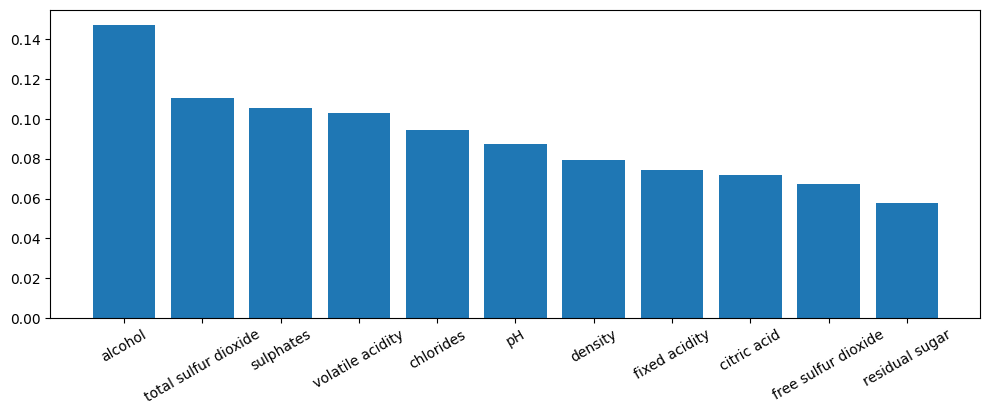

In [59]:
plt.figure(figsize=(12,4))
plt.bar(features.feature, features.importance)
plt.xticks(rotation=30, fontsize=10)
plt.show()

In [62]:
# features.importance 누적합
# l = [1, 2, 3]
# np.cumsum(l)
y_stack = np.cumsum(features.importance)
np.c_[features.importance, y_stack]

array([[0.14742184133903136, 0.14742184133903136],
       [0.11061317084870763, 0.258035012187739],
       [0.10576059267477937, 0.3637956048625184],
       [0.10294549997557234, 0.4667411048380907],
       [0.0943902572828397, 0.5611313621209304],
       [0.0876469168507664, 0.6487782789716968],
       [0.0794001417313364, 0.7281784207030332],
       [0.07453202688598923, 0.8027104475890224],
       [0.0718636884315302, 0.8745741360205527],
       [0.06742066890580815, 0.9419948049263608],
       [0.05800519507363927, 1.0]], dtype=object)

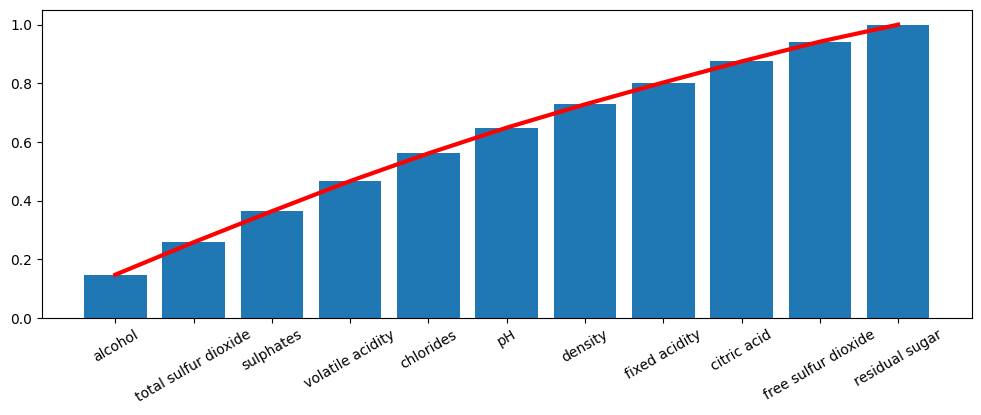

In [64]:
# 누적합을 이용하여 시각화
plt.figure(figsize=(12,4))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color='r', lw=3)
plt.xticks(rotation=30, fontsize=10)
plt.show()

### RFE(Reeursive Frature Elimination) 방식
- RFE 클래스를 이용 : 중요도에 따라 중요도가 낮은 변수부터 하나씩 제거해 가면서 최종 선택된 변수 갯수만큼 중요도가 높은 변수를 찾는다.

In [66]:
# 5개 특징이 남을 때까지 변수를 제거(기준:feature_importances_)
from sklearn.feature_selection import RFE
rfe = RFE(rf_model,
         n_features_to_select=5)
rfe.fit(train_X, train_y)
rfe.get_support()

array([False,  True,  True, False, False, False,  True, False, False,
        True,  True])

In [70]:
features_rfe = pd.DataFrame(data = np.c_[X.columns, rfe.get_support()],
                            columns=['feature','selected'])
features_rfe[features_rfe.selected==True]

,feature,selected
1,volatile acidity,True
2,citric acid,True
6,total sulfur dioxide,True
9,sulphates,True
10,alcohol,True


## 1-5 SelectKBest
- 가장 높은 score에 따라 k개 feature 선택

In [72]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X.shape, y.shape, type(X), type(y)

((150, 4), (150,), numpy.ndarray, numpy.ndarray)

In [77]:
features_names = iris.columns[:-1].tolist()
features_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [80]:
# 가장 중요한 feature 1개 추출
# f_classif : y는 범주형. x는 연속성
# chi2 : y는 범주형, x는 범주형, 양의 실수
# mutual_info : 비선형 데이터 고려...
X_new = SelectKBest(f_classif,  # x가 연속성
                   k=1, # 추출될 feature 갯수
                   ).fit_transform(X, y)
X_new[:5] # petal_length

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4]])

In [79]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절. 파라미터 선택
- 하이퍼파라미터(사용자가 직접 선택할 수 있는 파라미터). 최적의 결과를 내는 하이퍼파라미터값
    1. validation_curve() : 단일 하이퍼 파라미터 최적화 함수
    2. GridSearchCV() : 복수 하이퍼 파라미터 최적화 클래스(가장 높은 score를 내는 모형까지 찾아 줌)

## 2-1 Validation_curve()
- param_name, param_range(리스트), scoring(성능기준지표) 매개변수로 받아 최적의 성능 계산

In [89]:
# 데이터
from sklearn.datasets import load_digits
digits = load_digits()
# digits.data : (1797, 64) 배열 (독립변수)
# digits.images : (1797, 8, 8) 배열
# digits.target : (1797,) 배열 (타켓변수)
# digits.target_names : 타겟변수 내용
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [90]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [92]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [94]:
np.all(X[0].reshape(8,8) == digits.images[0])

True

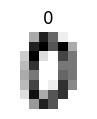

In [100]:
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape(8,8), cmap='gray_r')
plt.title(y[0])
plt.axis('off')
plt.show()

In [102]:
from sklearn.svm import SVC
model = SVC(probability=True)  # probability=True:판별모형이라도 proba가능
model.fit(X, y)

SVC(probability=True)

In [103]:
# 예측값
model.predict(X[0].reshape(1,-1))

array([0])

In [105]:
# 예측확률
print(model.classes_)
print(model.predict_proba(X[0].reshape(1,-1)))

[0 1 2 3 4 5 6 7 8 9]
[[9.91379955e-01 1.84777742e-04 4.50554961e-04 9.00550641e-04
  5.90889121e-04 1.30772433e-03 7.13661667e-04 9.04199092e-04
  7.54533779e-04 2.81315349e-03]]


In [106]:
for c, p in zip(model.classes_,
               model.predict_proba(X[0].reshape(1,-1))[0]):
    print('{}일 확률 : {:.3f}'.format(c, p))

0일 확률 : 0.991
1일 확률 : 0.000
2일 확률 : 0.000
3일 확률 : 0.001
4일 확률 : 0.001
5일 확률 : 0.001
6일 확률 : 0.001
7일 확률 : 0.001
8일 확률 : 0.001
9일 확률 : 0.003


In [107]:
model.score(X, y)

0.996661101836394

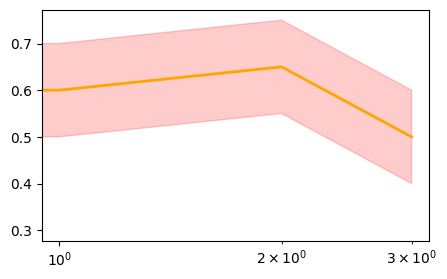

In [110]:
import matplotlib.pyplot as plt
import numpy as np
range = np.array([0, 1, 2, 3])
score = np.array([0.4, 0.6, 0.65, 0.5])
plt.figure(figsize=(5, 3))
plt.semilogx(range, score, color='orange', lw=2)
plt.fill_between(range, score-0.1, score+0.1, color='red', alpha=0.2)
plt.show()

In [113]:
# SVC() 모형에서 C 파라미터 값을 다음의 범위 중 제일 좋음 c값?
# 10의 -6승부터 10의 -1승까지 로그간격으로 균긍분포 10개를 추출
param_range = np.logspace(-6, -1, 10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [114]:
%%time
import time
from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve(
    SVC(),  # 예측모형
    X, y,
    param_name='gamma',
    param_range=param_range,  # list로 파라미터 전달
    cv=10,  # 교차검증 : 데이터 10개중 1개씩 test 데이터로 검증하고 평균 score
    scoring='accuracy',
    n_jobs=-1,  # 시스템의 모든 core 사용
    
)

CPU times: total: 562 ms
Wall time: 18.2 s


In [116]:
test_score.shape, train_score.shape

((10, 10), (10, 10))

In [121]:
train_score_mean = np.mean(train_score, axis=1)  # 행별평균
test_score_mean = np.mean(test_score, axis=1)
train_score_std = np.std(train_score, axis=1)
test_score_std = np.std(test_score, axis=1)

In [118]:
train_score_mean

array([0.13836306, 0.72045751, 0.93439655, 0.96939318, 0.98775736,
       0.99789765, 1.        , 1.        , 1.        , 1.        ])

In [120]:
test_score_mean

array([0.13871508, 0.70395717, 0.90871198, 0.94264742, 0.95880509,
       0.97495655, 0.97496586, 0.80522036, 0.19709497, 0.10463687])

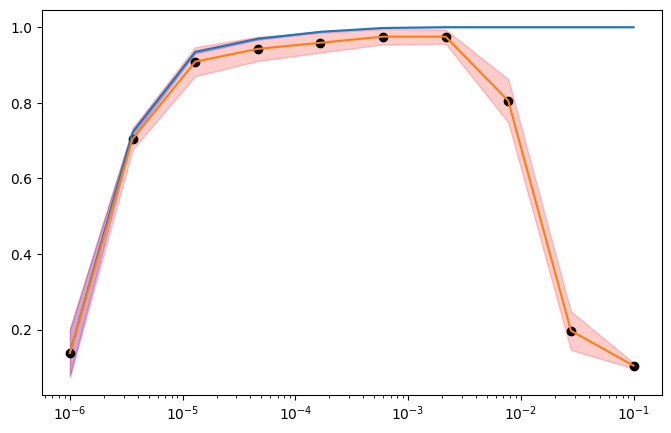

In [128]:
plt.figure(figsize=(8,5))
plt.semilogx(param_range, train_score_mean)
plt.fill_between(param_range, train_score_mean-train_score_std, 
                train_score_mean+train_score_std,
                alpha=0.2,
                color='blue')
plt.semilogx(param_range, test_score_mean)
plt.fill_between(param_range, test_score_mean-test_score_std,
                test_score_mean+test_score_std,
                alpha=0.2,
                color='red')
plt.scatter(param_range, test_score_mean, c='k')

In [129]:
test_score_mean.argmax()

6

In [133]:
# 최적의 gammar값
gamma = param_range[6]
gamma

0.0021544346900318843

In [134]:
model = SVC(gamma=gamma).fit(X, y)

In [135]:
model.score(X, y)

1.0

## 2-2 GridSearchCV
- 복수개의 하이퍼 파라미터 최적화 클래스
- 모델도 가지고 옴
- fit(), score(), predict(), predict_proba(), decision_funcion()

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

# 데이터
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_X, redwine_y = redwine.iloc[:,:-1], redwine.iloc[:,-1]
redwine_X.shape, redwine_y.shape

((1599, 11), (1599,))

In [140]:
%%time
# SelectKBest로 최적의 독립변수 k개 찾음 -> SVC()에서 최적의 C값을 찾음
selection = SelectKBest(k=1)  # 가장 평가 점수가 높은 k개 찾음
svc = SVC(kernel='linear')  # 직선으로 나누는 가장 단수난 분류모형
pipeline = Pipeline([('select',selection), ('svc',svc)])
param_grid = dict(select__k = [4, 5, 6, 7, 8, 9, 10, 11],
                  svc__C = [0.1, 1, 10],  # 오차 범위 허용 정도(큰C:엄격, 작은C:허용범위 큼)
 )
grid_search = GridSearchCV(
                pipeline,
                param_grid=param_grid, # 파리미터들
                cv=2,
                verbose=2,  # 로그 출력의 수다스러운 정도
                n_jobs=-1
)
grid_search.fit(redwine_X.values, redwine_y.values)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
CPU times: total: 18.9 s
Wall time: 2min 42s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('select', SelectKBest(k=1)),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'select__k': [4, 5, 6, 7, 8, 9, 10, 11],
                         'svc__C': [0.1, 1, 10]},
             verbose=2)

In [141]:
# 최적의 파라미터 값
grid_search.best_params_

{'select__k': 9, 'svc__C': 1}

In [142]:
# 최적의 모형
model = grid_search.best_estimator_
model.score(redwine_X.values, redwine_y.values)

0.5878674171357098

In [145]:
model=SVC().fit(redwine_X.values, redwine_y.values)
model.score(redwine_X.values, redwine_y.values)

0.5103189493433395

# 3절. 자료 분균형 처리
- 단순 언더/오버 샘플링
- 단, 단순 오버 샘플링시 소수의 데이터를 복사하면, 과적합 우려
- 오버 샘플링하는 방법 : SMOTE
## 3-1 SMOTE를 이용한 오버샘플링 전

In [146]:
# 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000,
                          n_features=10,  # 독립변수 갯수
                          n_informative=5,  # 타겟변수에 영향을 미치는 독립변수
                          n_redundant=0,
                          n_clusters_per_class=1,
                          n_classes=2,
                          weights=[0.99, 0.01],  # 각 클래스에 할당된 표본
                          random_state=42)
y.mean()

0.014

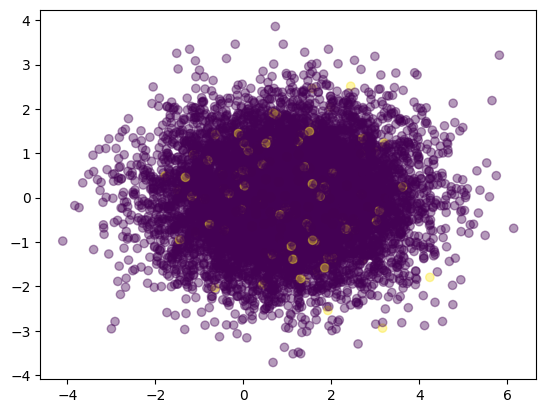

In [147]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.4)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,
                                 max_features=2,
                                 random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

In [151]:
y_hat = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_hat)

array([[2958,    0],
       [  34,    8]], dtype=int64)

In [152]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



## 3-2 SMOTE를 이용한 전제 오버샘플링 후 데이터 셋 분리
- imbalanced-learn 라이브러리 intsall

In [157]:
# 0그룹과 1그룹의 갯수
df = pd.DataFrame(np.c_[X, y])
df.iloc[:,-1].value_counts()

0.0    9860
1.0     140
Name: 10, dtype: int64

In [167]:
from imblearn.over_sampling import SMOTE
#sm = SMOTE()  # 0그룹 : 1그룹 = 1:1
sm = SMOTE(sampling_strategy={0:9860, 1:420})
X_resampled, y_resampled = sm.fit_resample(X,y)
X_resampled.shape, y_resampled.shape

((10280, 10), (10280,))

In [168]:
# 0그룹과 1그룹의 갯수
df = pd.DataFrame(np.c_[X_resampled, y_resampled])
df.iloc[:,-1].value_counts()

0.0    9860
1.0     420
Name: 10, dtype: int64

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled,
                                                   test_size=0.3,
                                                   stratify=y_resampled,
                                                   random_state=42)

rf_model = RandomForestClassifier(n_estimators=100,
                                 max_features=2,
                                 random_state=42)

rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[2958,    0],
       [  49,   77]], dtype=int64)

In [170]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2958
           1       1.00      0.61      0.76       126

    accuracy                           0.98      3084
   macro avg       0.99      0.81      0.88      3084
weighted avg       0.98      0.98      0.98      3084



## 3-3 가중치 제어
- 자료 불균형 처리의 또 다른 방법
- sklearn의 예측 모형에서 class_weigh 매개변수 설정

In [171]:
rf_model = RandomForestClassifier(n_estimators=100,
                                 max_features=2,
                                 class_weight={0:1, 1:1.4},  # 1그룹을 1.4배 더 중요하게
                                 random_state=42,
                                 )
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

# 4절. 앙상블 모형
- 목적 : 여러 분류모형을 하나의 메타 분류모델로 연결하여 개별 모형보다 더 좋은 일반화 성을 달성
- 방법 : 
    * 하나의 메타 분류 알고리즘 이용 : 배깅(bagging), 부스팅(boosting)
    * 여러 분류 알고리즘을 이용 : 다수결투표
- 배깅 vs 부스팅
    * 배깅
        - 복원추출로 데이터를 뽑아 병렬 학습 후 score가 높은 모델에 가중치 부여
        - 과적합 줄일 수 있음
        - 데이터가 충분하고 과적합을 방지하면서 안정적인 모델이 필요할 때
        - RandomForestClassfier, BagginClassifier
    * 부스팅
        - 순차적으로 모델 학습. 앞의 모델에서 틀린 데이터의 50%를 재학습
        - 오답에 가중치를 둠(오답에 더 집중)
        - 성능 극대화
        - 상능 극대화 하는데, 데이터가 비교적 적거나 복잡한 패턴의 학습을 해야할 경우

## 4-1 배깅 알고리즘

In [173]:
wine_df = pd.read_csv('data/wine.csv')
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [176]:
X = wine_df.iloc[:,1:]
y = wine_df['Class label']
X.shape, y.shape

((178, 13), (178,))

In [177]:
y.value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [178]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=1)

In [179]:
# 의사결정나무 알고리즘
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy',
                                   random_state=1)
tree_model.fit(train_X, train_y)
tree_model.score(test_X, test_y)

0.9074074074074074

In [180]:
# 배깅 알고리즘
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(estimator=tree_model,
                             n_estimators=500,
                             bootstrap=True,  # 복원추출을 허용
                             bootstrap_features=False,  # 모든 feature 사용해서 학습
                             random_state=1)
bag_model.fit(train_X, train_y)
bag_model.score(test_X, test_y)

0.9629629629629629

In [181]:
# 랜덤포레스트알고리즘
rf_model = RandomForestClassifier().fit(train_X, train_y)
rf_model.score(test_X, test_y)

0.9814814814814815

### 배깅 알고리즘 0.632 규칙

In [203]:
np.random.choice(10, 10, replace=True)  # 10개 데이터를 10개 복원 추출 뽑기

array([1, 2, 7, 2, 4, 1, 9, 4, 1, 4])

In [205]:
len(set(np.random.choice(10000, 10000, replace=True)))

6366

In [261]:
N = 1000000
len(set(np.random.choice(N,N))) / N

0.632422

## 4-2 임의의 데이터를 만들어 최적 모형 탐색

In [262]:
X, y = make_classification(n_samples=10000,
                          n_features=10,
                          n_informative=5,
                          n_redundant=0,
                          n_classes=2,
                          n_clusters_per_class=1,
                          weights=[0.9, 0.1],  # 0그룹 90%,  1그룹 1-%
                          random_state=42)

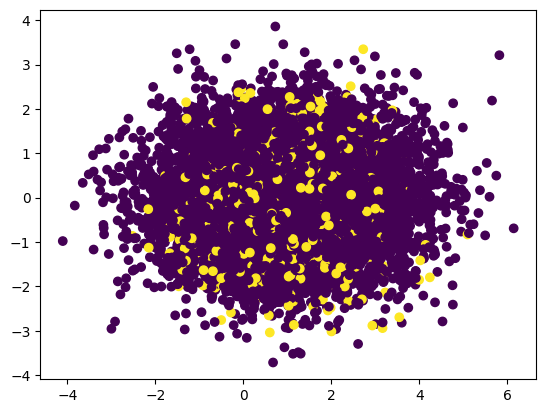

In [264]:
plt.scatter(X[:,0], X[:,1], c=y)

In [267]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape

((12556, 10), (12556,), (3000, 10), (3000,))

In [270]:
from sklearn.metrics import precision_score, recall_score, f1_score
def model_measure(model, train_X=resampled_X, train_y=resampled_y,
                 test_X=test_X, test_y=test_y):
    '매개변수로 들어온 model 학습후 accuracy, precision, recall, f1score를 반환'
    model.fit(train_X, train_y)
    y_hat = model.predict(test_X) # 모델 예측값
    accuracy = model.score(test_X, test_y)
    precision = precision_score(test_y, y_hat)
    recall    = recall_score(test_y, y_hat)
    f1score   = f1_score(test_y, y_hat)
    return "정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}, f1 :{:.3f}".format(
            accuracy, precision, recall, f1score
    )

In [271]:
model_measure(RandomForestClassifier(n_estimators=100,
                                    max_features=2,
                                    random_state=42))

'정확도:0.981, 정밀도:0.934, 재현율:0.877, f1 :0.905'

In [272]:
model_measure(SVC(random_state=42))

'정확도:0.989, 정밀도:0.969, 재현율:0.926, f1 :0.947'

## 4-3 부스팅 알고리즘
- Adaboost, XGB, LGBM, CATBoost

In [273]:
from sklearn.ensemble import AdaBoostClassifier
model_measure(AdaBoostClassifier())

'정확도:0.961, 정밀도:0.756, 재현율:0.913, f1 :0.827'

In [275]:
# pip install --dray-run xgboost=1.7.3 후 설치
from xgboost import XGBClassifier  
model_measure(XGBClassifier(max_depth=10,  # tree 최대 깊이
                           n_estimators=100,  # 나무 갯수
                           learning_rate=0.01))  # 학습률

'정확도:0.974, 정밀도:0.853, 재현율:0.900, f1 :0.876'

In [276]:
from lightgbm import LGBMClassifier  # pip install lightgbm
model_measure(LGBMClassifier(force_col_wise=True))

[LightGBM] [Info] Number of positive: 6278, number of negative: 6278
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


'정확도:0.985, 정밀도:0.940, 재현율:0.913, f1 :0.926'

## 4-4 투표를 이용한 앙상블
- voting='hard' : 다수결로 투표
- voting ='soft' : 확률의 합을 계산한 투표

In [277]:
X, y = make_classification(n_samples=200,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          n_clusters_per_class=1,
                          random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)


In [278]:
rf_model = RandomForestClassifier(max_features=2, random_state=42)
xgb_model = XGBClassifier(max_depth=10,
                         n_estimators=100,
                         learning_rate=0.01,  # 0.01~0.2
                         eval_metric='logloss')
lgb_model = LGBMClassifier(n_estimators=100, forec_col_wise=True, verbose=-1)
print(model_measure(rf_model))
print(model_measure(xgb_model))
print(model_measure(lgb_model))

정확도:0.981, 정밀도:0.934, 재현율:0.877, f1 :0.905
정확도:0.974, 정밀도:0.853, 재현율:0.900, f1 :0.876
정확도:0.985, 정밀도:0.940, 재현율:0.913, f1 :0.926


In [280]:
%%time
from sklearn.ensemble import VotingClassifier
v_model = VotingClassifier(estimators=[('rfm',rf_model),
                                      ('xgb',xgb_model),
                                      ('lgb',lgb_model)],
                          voting='hard')
model_measure(v_model)

CPU times: total: 16.9 s
Wall time: 5.06 s


'정확도:0.984, 정밀도:0.934, 재현율:0.909, f1 :0.921'